In [2]:
import os
from PIL import Image
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
root ='Images'

fnames= os.listdir(root)

In [4]:
len(fnames)

245

Images\EO1H0260472017071110PF_B001_L1GST.TIF
Images\EO1H0260472017071110PF_B002_L1GST.TIF
Images\EO1H0260472017071110PF_B003_L1GST.TIF
Images\EO1H0260472017071110PF_B004_L1GST.TIF
Images\EO1H0260472017071110PF_B005_L1GST.TIF
Images\EO1H0260472017071110PF_B006_L1GST.TIF
Images\EO1H0260472017071110PF_B007_L1GST.TIF
Images\EO1H0260472017071110PF_B008_L1GST.TIF
Images\EO1H0260472017071110PF_B009_L1GST.TIF
Images\EO1H0260472017071110PF_B010_L1GST.TIF


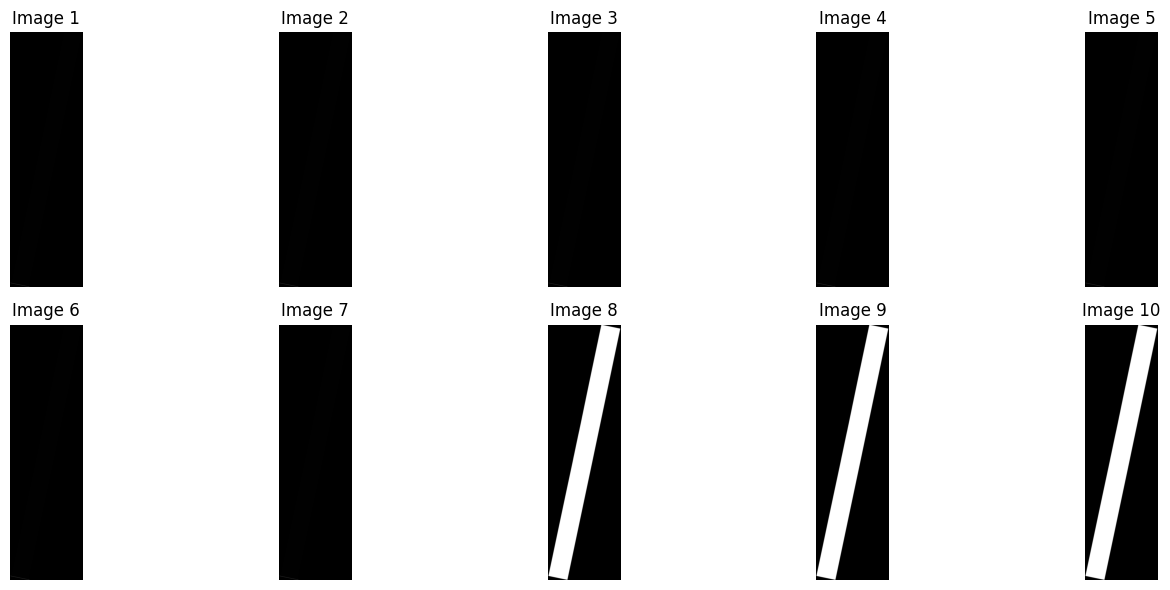

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Define the figure and axes

for i in range(10):
    filepath = os.path.join(root, fnames[i])  # Generate the file path
    print(filepath)  # Print the file path for debugging (optional)
    
    try:
        img = Image.open(filepath)  
        ax = axs[i // 5, i % 5]  
        ax.imshow(img) 
        ax.axis('off')  
        ax.set_title(f"Image {i+1}")  
    except Exception as e:
        print(f"Error opening {filepath}: {e}")

plt.tight_layout()  
plt.show()


In [13]:
import os
file_path = r'C:\Users\toist\OneDrive\Desktop\Maojor_project\Images'
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    print("File found:", file_path)


File found: C:\Users\toist\OneDrive\Desktop\Maojor_project\Images


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# Provide the full file path
file_path = r"C:\Users\toist\OneDrive\Desktop\Maojor_project\Images\example_file.TIF"  # Replace with actual path

# Step 1: Open the .TIF file
with rasterio.open(file_path) as src:
    data = src.read()  # Read all bands into a 3D numpy array
    print(f"Data shape: {data.shape}")  # Shape: (bands, height, width)

# Transpose the data to match (height, width, bands) format for visualization
data = np.transpose(data, (1, 2, 0))

# Step 2: Visualize RGB Composite (Bands 30, 20, 10 as an example)
rgb_bands = [30, 20, 10]  # Choose 3 bands for visualization
rgb_image = data[:, :, rgb_bands]
rgb_image = (rgb_image / np.max(rgb_image))  # Normalize for display

plt.figure(figsize=(8, 6))
plt.imshow(rgb_image)
plt.title("RGB Composite of Hyperspectral Data")
plt.axis("off")
plt.show()

# Step 3: Visualize Individual Bands
plt.figure(figsize=(12, 8))
for i in range(1, 6):  # Visualize first 5 bands
    plt.subplot(1, 5, i)
    plt.imshow(data[:, :, i - 1], cmap='gray')  # Subtract 1 for zero-based indexing
    plt.title(f"Band {i}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Step 4: Spectral Profile of a Single Pixel
pixel_location = (50, 50)  # Example pixel
spectral_profile = data[pixel_location[0], pixel_location[1], :]

plt.figure(figsize=(10, 5))
plt.plot(spectral_profile)
plt.title("Spectral Profile of Pixel (50, 50)")
plt.xlabel("Bands")
plt.ylabel("Reflectance")
plt.grid(True)
plt.show()


FileNotFoundError: Unable to locate file "C:\Users\toist\OneDrive\Desktop\Maojor_project\Images\example_file.hdr". If the file exists, use its full path or place its directory in the SPECTRAL_DATA environment variable.